# Arxiv Papers
[source](https://arxiv.org/help/bulk_data)

In [29]:
import urllib.request

url = 'http://export.arxiv.org/api/query?search_query=all:electron&start=0&max_results=10'
data = urllib.request.urlopen(url).read().strip()

In [30]:
type(data)

bytes

In [33]:
data

b'<?xml version="1.0" encoding="UTF-8"?>\n<feed xmlns="http://www.w3.org/2005/Atom">\n  <link href="http://arxiv.org/api/query?search_query%3Dall%3Aelectron%26id_list%3D%26start%3D0%26max_results%3D10" rel="self" type="application/atom+xml"/>\n  <title type="html">ArXiv Query: search_query=all:electron&amp;id_list=&amp;start=0&amp;max_results=10</title>\n  <id>http://arxiv.org/api/WyBPOs+pRgzCTXTMWhtnbcOmk6g</id>\n  <updated>2019-06-26T00:00:00-04:00</updated>\n  <opensearch:totalResults xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">146428</opensearch:totalResults>\n  <opensearch:startIndex xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">0</opensearch:startIndex>\n  <opensearch:itemsPerPage xmlns:opensearch="http://a9.com/-/spec/opensearch/1.1/">10</opensearch:itemsPerPage>\n  <entry>\n    <id>http://arxiv.org/abs/cond-mat/0102536v1</id>\n    <updated>2001-02-28T20:12:09Z</updated>\n    <published>2001-02-28T20:12:09Z</published>\n    <title>Impact of Electron-Electro

In [12]:
)import xml.etree.ElementTree as ET

In [14]:
root = ET.fromstring(data)

In [15]:
root.

<Element '{http://www.w3.org/2005/Atom}feed' at 0x7fd004201368>

In [28]:
for child in root:
    print(' ',child.tag)
    for c in child:
        print(c.tag, c.text)

  {http://www.w3.org/2005/Atom}link
  {http://www.w3.org/2005/Atom}title
  {http://www.w3.org/2005/Atom}id
  {http://www.w3.org/2005/Atom}updated
  {http://a9.com/-/spec/opensearch/1.1/}totalResults
  {http://a9.com/-/spec/opensearch/1.1/}startIndex
  {http://a9.com/-/spec/opensearch/1.1/}itemsPerPage
  {http://www.w3.org/2005/Atom}entry
{http://www.w3.org/2005/Atom}id http://arxiv.org/abs/cond-mat/0102536v1
{http://www.w3.org/2005/Atom}updated 2001-02-28T20:12:09Z
{http://www.w3.org/2005/Atom}published 2001-02-28T20:12:09Z
{http://www.w3.org/2005/Atom}title Impact of Electron-Electron Cusp on Configuration Interaction Energies
{http://www.w3.org/2005/Atom}summary   The effect of the electron-electron cusp on the convergence of configuration
interaction (CI) wave functions is examined. By analogy with the
pseudopotential approach for electron-ion interactions, an effective
electron-electron interaction is developed which closely reproduces the
scattering of the Coulomb interaction but 

# Arxiv Scraper Library

[Arxiv Scraper](https://github.com/mahdisadjadi/arxivscraper)

In [55]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

DIR_PATH = '/home/anneke/Documents/ann-mitchell-text-classification/dataset/arxiv/'

In [4]:
tot = []
for root, dirs, files in os.walk(DIR_PATH, topdown=False):
    for name in files:
        df = pd.read_csv(os.path.join(root, name))
        tot.append(df)

In [110]:
np.sum(tot)

174453

In [100]:
tot[0]['categories'][0].split(' ')

['math.st', 'cs.lg', 'math.pr', 'stat.ap', 'stat.th']

## Data distribution analysis

### By year

In [16]:
year = ['20{:02d}'.format(i) for i in range(9,20)]
year

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [39]:
year_paper_count = dict()

for y in year:
    year_paper_count[y] = 0
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data = pd.read_csv(os.path.join(ABS_PATH, d))
        year_paper_count[y] += len(data)

In [44]:
df_year = pd.DataFrame({'year': year, 'count':[year_paper_count[y] for y in year]})

## Note that 2019 is only for 6 months span

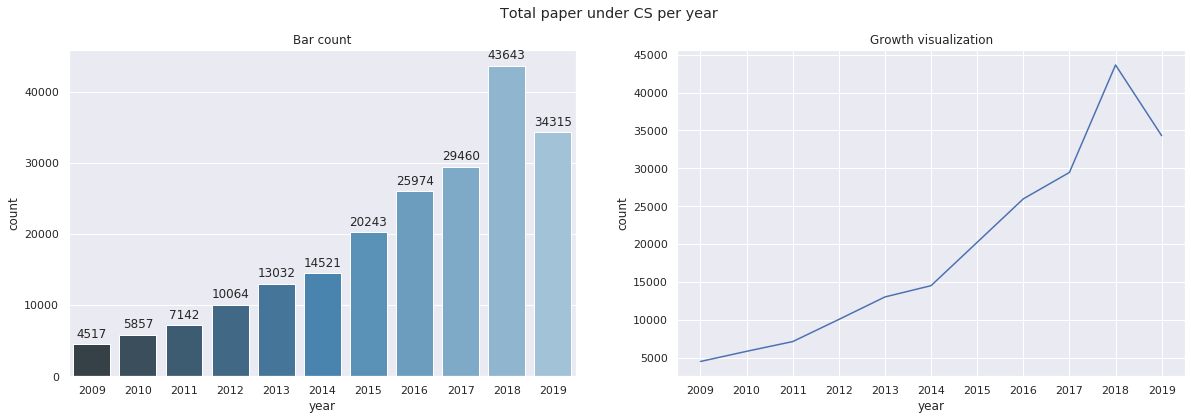

In [96]:
plt.figure(figsize=(20,6))
plt.suptitle('Total paper under CS per year')

sub = plt.subplot(1, 2, 1)
sub.set_title('Bar count')
ax = sns.barplot(x="year", y="count", data=df_year, palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sub = plt.subplot(1, 2, 2)  
sub.set_title('Growth visualization')
ax = sns.lineplot(x="year", y="count", data=df_year)

In [101]:

# Per categories
# TODO : count each categories


